In [1]:
import komm
import math
import matplotlib.pyplot as plt

In [2]:
with open("pg11.txt", "r", encoding="utf-8") as file:
    text = file.read()
    
    characters = {}
    for char in text:
        if char in characters:
            characters[char] += 1
        else:
            characters[char] = 1
    
    sorted_letters = sorted(characters.items())

In [3]:
letters = [letter for letter, occurrences in sorted_letters]
occurrences = [occurrences for letter, occurrences in sorted_letters]

print("Letters count:", len(letters))


Letters count: 91


In [4]:
BFR = math.ceil(math.log2(len(letters)))
print("Bits for representation:", BFR)

Bits for representation: 7


In [5]:
sorted_letters = [letter for _, letter in sorted(zip(occurrences, letters), reverse=True)]
sorted_occurrences = [occurrence for occurrence, _ in sorted(zip(occurrences, letters), reverse=True)]

In [6]:
total_letters = sum(occurrences)
print("Total letters:", total_letters)

def percentage(occurrences, total):
    return [occurrence / total for occurrence in occurrences]

percentages = percentage(occurrences, total_letters)



Total letters: 163919


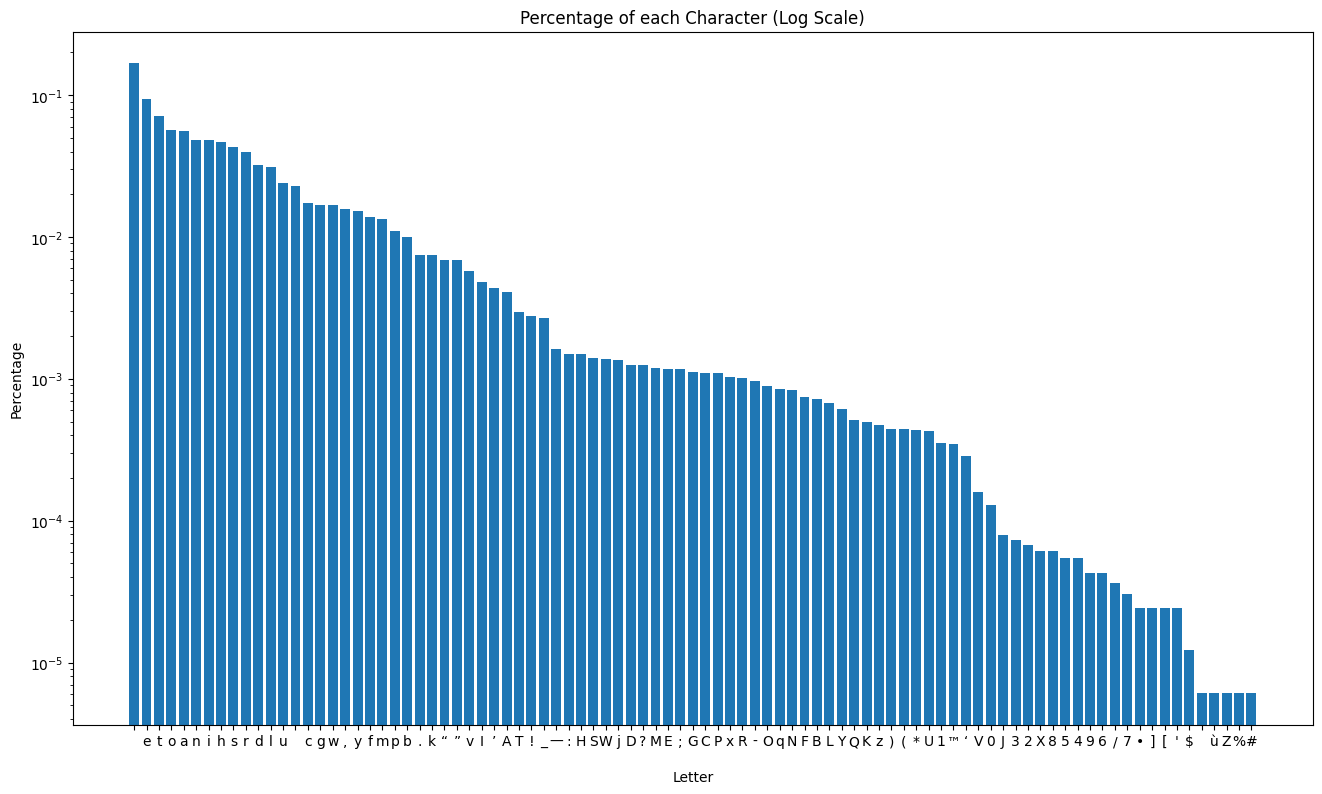

In [7]:
sorted_letters = [letter for _, letter in sorted(zip(occurrences, letters), reverse=True)]
sorted_percentages = [percentage for _, percentage in sorted(zip(occurrences, percentages), reverse=True)]

plt.figure(figsize=(16, 9))
plt.bar(sorted_letters, sorted_percentages)
plt.xlabel("Letter")
plt.ylabel("Percentage")
plt.title("Percentage of each Character (Log Scale)")
plt.yscale("log")
plt.show()


In [8]:
pmf = {letter: percentage for letter, percentage in zip(letters, percentages)}
print("PMF:", list(pmf.values()))

huff = komm.HuffmanCode(list(pmf.values()))
print("Huffman code:", huff.codewords)
print("Huff Ratio:", huff.rate(list(pmf.values())))
print("Compress Ratio:", BFR - huff.rate(list(pmf.values())))

PMF: [0.022919856758520978, 0.16838194474100013, 0.00275745947693678, 6.100574064019425e-06, 1.220114812803885e-05, 6.100574064019425e-06, 2.44022962560777e-05, 0.00044534190667341796, 0.00044534190667341796, 0.00043924133260939856, 0.015672374770465902, 0.000963890702115069, 0.007461002080295756, 3.660344438411654e-05, 0.0001281120553444079, 0.0003538332957131266, 6.710631470421366e-05, 7.320688876823309e-05, 5.490516657617482e-05, 5.490516657617482e-05, 4.2704018448135966e-05, 3.0502870320097122e-05, 6.1005740640194244e-05, 4.2704018448135966e-05, 0.0015007412197487783, 0.001177410794355749, 0.0012445171090599626, 0.004087384622893014, 0.0007198677395542921, 0.0011042039055875158, 0.0012567182571880013, 0.001177410794355749, 0.0007503706098743891, 0.0011103044796515352, 0.001494640645684759, 0.004782850066191229, 7.930746283225251e-05, 0.0004941464991855734, 0.0006771637211061561, 0.0011957125165478072, 0.0008296780727066417, 0.0008906838133468359, 0.0010981033315234964, 0.0005124482

In [9]:
index = {i: letter for i, letter in enumerate(letters)}
print("Index:", index)


Index: {0: '\n', 1: ' ', 2: '!', 3: '#', 4: '$', 5: '%', 6: "'", 7: '(', 8: ')', 9: '*', 10: ',', 11: '-', 12: '.', 13: '/', 14: '0', 15: '1', 16: '2', 17: '3', 18: '4', 19: '5', 20: '6', 21: '7', 22: '8', 23: '9', 24: ':', 25: ';', 26: '?', 27: 'A', 28: 'B', 29: 'C', 30: 'D', 31: 'E', 32: 'F', 33: 'G', 34: 'H', 35: 'I', 36: 'J', 37: 'K', 38: 'L', 39: 'M', 40: 'N', 41: 'O', 42: 'P', 43: 'Q', 44: 'R', 45: 'S', 46: 'T', 47: 'U', 48: 'V', 49: 'W', 50: 'X', 51: 'Y', 52: 'Z', 53: '[', 54: ']', 55: '_', 56: 'a', 57: 'b', 58: 'c', 59: 'd', 60: 'e', 61: 'f', 62: 'g', 63: 'h', 64: 'i', 65: 'j', 66: 'k', 67: 'l', 68: 'm', 69: 'n', 70: 'o', 71: 'p', 72: 'q', 73: 'r', 74: 's', 75: 't', 76: 'u', 77: 'v', 78: 'w', 79: 'x', 80: 'y', 81: 'z', 82: 'ù', 83: '—', 84: '‘', 85: '’', 86: '“', 87: '”', 88: '•', 89: '™', 90: '\ufeff'}


In [10]:
encoded_text = [list(index.keys())[list(index.values()).index(letter)] for letter in text]
print("Encoded text:", encoded_text[:100])

Encoded text: [90, 46, 63, 60, 1, 42, 73, 70, 65, 60, 58, 75, 1, 33, 76, 75, 60, 69, 57, 60, 73, 62, 1, 60, 28, 70, 70, 66, 1, 70, 61, 1, 27, 67, 64, 58, 60, 6, 74, 1, 27, 59, 77, 60, 69, 75, 76, 73, 60, 74, 1, 64, 69, 1, 49, 70, 69, 59, 60, 73, 67, 56, 69, 59, 0, 1, 1, 1, 1, 0, 46, 63, 64, 74, 1, 60, 57, 70, 70, 66, 1, 64, 74, 1, 61, 70, 73, 1, 75, 63, 60, 1, 76, 74, 60, 1, 70, 61, 1, 56]
